In [92]:
import random

def trade_simulate(trade_start, num_trade, percent_win, percent_save_win, exit, stop_loss):

    # Set the percentage of True and False
    percent_win = percent_win
    percent_lose = 1 - percent_win

    # Generate the list
    win_lose_list = random.choices([True, False], weights=[percent_win, percent_lose], k=num_trade)
    # print(win_lose_list)

    trade_list = [(trade_start, 0)]

    for i in win_lose_list:

        diff = 0
        
        if i == True:
            diff = trade_list[-1][0] * random.uniform(0, exit)
            trade_list.append((trade_list[-1][0] + diff * (1 - percent_save_win), trade_list[-1][1] + diff * percent_save_win))
        else:
            diff = trade_list[-1][0] * random.uniform(-stop_loss, 0)
            trade_list.append((trade_list[-1][0] + diff, trade_list[-1][1]))
        
    # print(win_lose_list)
    return round(trade_list[-1][0] + trade_list[-1][1], 2)

In [366]:
# config strategy
trade_start = 18093
num_trade = 60
percent_win = 0.6
percent_save_win = 0
exit = 0.03
stop_loss = 0.02

# trade_simulate(trade_start, num_trade, percent_win, percent_save_win, exit, stop_loss)

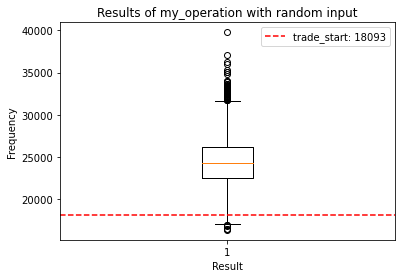

In [370]:
import matplotlib.pyplot as plt

# Set the number of times to run the operation
num_runs = 10000

# Run the operation many times and store the results
results = []
for _ in range(num_runs):
    result = trade_simulate(trade_start, num_trade, percent_win, percent_save_win, exit, stop_loss)
    results.append(result)

# Create a box plot of the results
plt.boxplot(results)
plt.axhline(y=trade_start, color='r', linestyle='--', label=f'trade_start: {trade_start}')
plt.title('Results of my_operation with random input')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.legend()
plt.show()